In [1]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import lmfit
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib.patches import Rectangle

infection_model = '''
    // Equations
    J1: S1 -> I1 ; b * I1 * S1  ; 
    J2: I1 -> R1 ; k1 * I1 ; 
    
    // Parameters
    b = 2 ; 
    k1 = 0.5 ; 
    
    // Initial Conditions
    S1 = 1.0 ; 
    I1 = 0.00001 ;
    R1 = 0.0 ;
'''

# Define objective function
def cost_fun(p):
    m = te.loada(infection_model)
    pp = p.valuesdict()
    for i in range(nParameters):
        m.model[toFit[i]] = pp[toFit[i]]
    try:
        s = m.simulate(int(T[0]), int(T[-1]), len(T)*10, ['time','I1'])
        diff = 0
        for i in range(len(T)):
            j = (np.abs(s['time'] - T[i])).argmin()
            diff += (Active_Cases[i] - s['I1'][j]) ** 2
        diff = np.sqrt(diff)
        clear_output(wait=True)
        plt.plot(T, Active_Cases,'.',label='Data')
        plt.plot(s['time'], s['I1'],label='Model')
        plt.legend(loc=1)
        plt.title('Chi-squared Error: %.2f' % diff)
        plt.ylabel('Number of Cases')
        plt.xlabel('Time (days)')
        plt.grid()
        plt.show()
    except RuntimeError:
        diff = 1E21
    return(diff)

# Modeling Covid-19 Pandemic Using an SIR Model
Josua Aponte-Serrano, Andy Somogyi and James Glazier

# Biological and Mathematical Background
Mathematical models are important tools for analyzing the spread and control of infectious diseases. These models incorporate the major components of disease transmission in simple mathematical equations. Modeling can be used to identify important epidemiological parameters and to evaluate prevention and control strategies. The use of models have led to discovery of mechanisms for controlling the spread of infections: vaccination for smallpox, magamenent of mosquito populations for malaria and prophilactic treatment for HIV. Understanding the transmission characteristics of infectious diseases can lead to better approaches to decreasing the transmission of these diseases.

Comparmental epidemiological models divide the population into compartments based on their health status: e.g. susceptible, infectious and recovered. If a small group of infected individuals is introduced into a large population, a basic problem is to describe the spread of the infection within the population as a function of time. Differential equations describe how people 'move' between compartments: e.g. how often a susceptible person becomes infectious, how long does it take for an infectious persons to recovered. Here we present the Susceptible-Infectious-Removed (SIR) model and use actual epidemiological data to estimate the parameters of the model. In the SIR model, $S(t)$ denotes the number of susceptible individuals, who are not infected but are susceptible to the disease. $I(t)$ denotes the number of infected individuals, who have been infected and are able to spread the disease by contact with susceptible individuals. $R(t)$ denotes the number of removed individuals, no longer susceptible or infectious. Removal is carried out either by recovery with full immunity or by death from the disease. A flow diagram of the SIR model looks like follows:

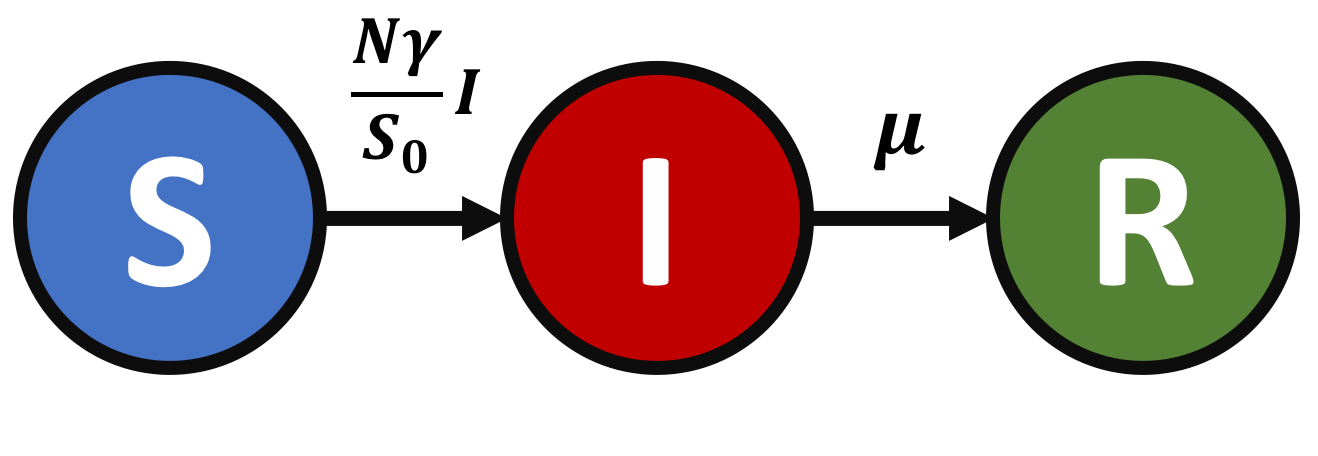

The SIR model has three parameters: the average number of contacts between infectious and susceptible individuals per unit time $(N)$, the probability of infection per contact $(\gamma)$ and the average duration of the disease $\big(\frac{1}{\mu}\big)$. The equations of the SIR model are as follow:
### Equations:

<font size="4">
<center>
$\frac{dS}{dt} = - N \gamma S\frac{I}{S_0}$
</center>
</font>
&nbsp;
<font size="4">
<center>
$\frac{dI}{dt} =  N \gamma S\frac{I}{S_0} - \mu I$
</center>
</font>
&nbsp;
<font size="4">
<center>
$\frac{dR}{dt} = \mu I$
</center>
</font>

### Parameters:

<font size="4">
<center>
$N \rightarrow$ number of encounter per unit time
</center>
</font>
&nbsp;
<font size="4">
<center>
$\gamma \rightarrow$ infection probability per encounter
</center>
</font>
&nbsp;
<font size="4">
<center>
$S_0 \rightarrow$ initial number of susceptible individuals
</center>
</font>
&nbsp;
<font size="4">
<center>
$\mu \rightarrow$ removal rate from the infectious population
</center>
</font>

Note that $\frac{I}{S_0}$ denotes the fraction of infected individuals with respect to the total population hence the term $N\gamma \frac{I}{S_0}$ denotes the probability of having an infectious encounter per unit time. This is a basic model but we can make some highly relevant general comments about epidemics and adequately describe some specific epidemics with such a model. More complicated compartmental structures are also possible: models in which infected individuals go through a latent phase before becoming infectious (SEIR), models in which recovered individuals lose immunity and become susceptible again (SIRS/SEIRS) and models where certain fraction of the population is vaccinated against the disease (SVEIR). What level of complexity is appropriate for the model is determined by the questions the model is intended to address.

Given the values of the parameters and the number of of susceptible and infectious individuals the model can be used to answer important questions regarding an epidemic: 1) wether the infections will spread or not, 2) how will it develop in time, 3) when it will start to decline, etc. The basic reproduction number, $R_0$ is defined as the expected number of disease cases (secondary infections) produced by an infected individual and can be determined from the parameters of the model: 

<font size="4">
<center>
$R_0 = \frac{N \gamma}{\mu S_0}$
</center>
</font>

$R_0$ is an indicator of how fast the infection is spreading, and can be used to determined wether the infection will spread or die out.  If every single infected individual produces more that one infection, $R_0 > 1$ and the epidemic ensues. The whole question of thresholds in epidemics is obviously important: the threshold $R_0 = 1$ is the dividing line between the infection dying out and the onset of an epidemic. $R_0$ also determines the number of individuals that will get infected over the course of the epidemic. One way to reduce the reproduction rate is to reduce the number of suceptibles ($S_0$). Vaccination is the common method of doing this and it has been successful in eradicating smallpox.

# Instructions to Use the Application

1. Load 'Active Cases' data by choosing region/country
2. Estimate $\mu$ by zooming in to the downside of the 'Active Cases' curve 
3. Estimate $N\gamma$ by zooming in to the upside of the 'Active Cases' curve
4. Estimate $R_0$ and $S_0$
5. Simulate the model with the estimated parameter values
6. Fit the model to the 'Active Cases' data

# Estimating Parameters from Experimental Data

The Covid-19 pandemic is one of the greatest public health challenges of our lifetimes. Along with publicly available epidemiological data, modeling can be used to determine how fast the disease is spreading, what would be the expected size of the pandemic (e.g. how many people will become infected) and what level of vaccionation rates and efficacy are required to control it. This application allows users to estimate the basic reproductive ratio $R_0$ along with other parameters such as the infection rate $\frac{N \gamma}{S_0}$ and the duration of the disease $\big(\frac{1}{\mu}\big)$. To estimate these parameters from experimental data, we assume that the SIR model is a good approximation at the early stages of the pandemic and include only data corrresponding to the first 'wave' of infections.

## Load Experimental Data

To estimate the parameters we need data for 'active cases' over time. Load the active cases data from the country/region to estimate the parameters from by choosing from the pulldown menu.

In [2]:
Country_W = widgets.Dropdown(
    options=['Spain','Italy','New Zealand'],
    value='Italy',
    description='Country: ',
    disabled=False,
)

def load_data(Country):
    Active_Cases = np.genfromtxt('PP_%s.txt' % Country, delimiter=',')
    T = np.arange(len(Active_Cases))
    return(T,Active_Cases)

def plot_experimental_data(Country):
    global T
    global Active_Cases
    global CurrentCountry
    CurrentCountry = Country
    [T,Active_Cases] = load_data(Country.replace(' ','_'))
    plt.plot(T, Active_Cases,label='Data')
    plt.ylabel('Number of Cases')
    plt.xlabel('Time (days)')
    plt.title('Active Cases in %s' % Country)
    plt.grid()
    plt.legend()
    plt.show()

def on_value_change_data(change):
    for i in range(3):
        LW_beta.value = [0, max(T)]
        LW_beta.max = max(T)
        LW_mu.value = [0, max(T)]
        LW_mu.max = max(T)
        BU_mu.value = False
        BU_beta.disabled = True
        BU_beta.value = False
        BU_R0.disabled = True
        BU_R0.value = False
        BU_initial_guess.disabled = True
        BU_initial_guess.value = False
        BU_fit.disabled = True
        BU_fit.value = False

interact(plot_experimental_data, Country=Country_W)
Country_W.observe(on_value_change_data,'value')
print('Data retreived from John Hopkins University COVID-19 tracker repository: https://github.com/CSSEGISandData/COVID-19')

interactive(children=(Dropdown(description='Country: ', index=1, options=('Spain', 'Italy', 'New Zealand'), value='Italy'), Output()), _dom_classes=('widget-interact',))

Data retreived from John Hopkins University COVID-19 tracker repository: https://github.com/CSSEGISandData/COVID-19


## Estimating $\mu$

### You will learn: how to estimate $\mu$ by looking at the downside of the active cases curve

To estimate $\mu$ we assume that in late stages of the epidemic, the rate of new infections is small $\frac{N \gamma}{S_0}SI \approx 0$. This can the result of containment measusers such as lockdowns and mask-wearing, which reduce the number of contacts $N$ and the probability of infection for contact $\gamma$, but also because the number of remaining susceptible individuals is small $S(t) \approx 0$ (e.g. a large number of people have been infected). 

<font size="4">
<center>
$\frac{dI}{dt} = \frac{N \gamma}{S_0}SI - \mu I \rightarrow \frac{dI}{dt} = - \mu I $
</center>
</font>

The value of $\mu$ is given by the slope of the downside of the curve of active cases:

<font size="4">
<center>
$I_{tmax} = I_{tmin}e^{- \mu (tmax-tmin)} \rightarrow \mu = \frac{ln(I_{tmin})-ln(I_{tmax})}{tmax-tmin}$ [$days^{-1}$] 
</center>
</font>


If this approximation is reasonable, when we plot the data on a semi-log scale, it should look like a straight line. If the slope is not linear, then our approximation is not so good and we have to define the time windown in which we want to measure the slope. 

### Instructions

1. In the following graph choose a time window that captures the downside of the curve of active cases by changing the time range using the slider
2. Make sure that the data looks like a straight line
3. Press the button to calculate $\mu$. The red line is the linear regression of the data from which the slope is estimated to calculate $\mu$.

In [24]:
LW_mu = widgets.IntRangeSlider(
    value=[0, max(T)],
    min=0,
    max=max(T),
    description='Times:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

BU_mu = widgets.ToggleButton(
    value=False,
    description='Calculate mu',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def do_linear_fit_mu(tmin,tmax):
    global mu
    x = T[tmin:tmax]
    y = np.log(Active_Cases[tmin:tmax])
    mu = np.abs(np.polyfit(x, y, 1)[0])
    line = x*np.polyfit(x, y, 1)[0] + np.polyfit(x, y, 1)[1]
    plt.plot(x,np.exp(line),'r',label='Linear Fit')
    print('mu = %.2f per day' % mu)
#     print('mu2 =',(np.log(Active_Cases[tmin]/Active_Cases[tmax]))/(tmax-tmin))
    print('Duration of the infection = %.2f days' % (1.0/mu))

def on_value_change_mu(change):
    BU_mu.value = False
    LW_beta.value = [0, max(T)]
    LW_beta.max = max(T)
    BU_beta.disabled = True
    BU_beta.value = False
    BU_R0.disabled = True
    BU_R0.value = False
    BU_initial_guess.disabled = True
    BU_initial_guess.value = False
    BU_fit.disabled = True
    BU_fit.value = False
    
def plot_data_mu(L,B):
    MinAct = min(Active_Cases[L[0]:L[1]])
    MaxAct = max(Active_Cases[L[0]:L[1]])
    plt.subplot(2,1,1)
    plt.title('Active Cases in %s' % CurrentCountry)
    plt.plot(T, Active_Cases,label='Data')
    plt.gca().add_patch(Rectangle((L[0], MinAct), 
                        L[1]-L[0], MaxAct-MinAct, 
                        fc ='none',  
                        ec ='red', 
                        lw = 2) ) 
    plt.yscale('log')
    plt.grid()
    plt.ylabel('Log Number of Cases')
    plt.subplot(2,1,2)
    plt.plot(T[L[0]:L[1]], Active_Cases[L[0]:L[1]],label='Data')
    plt.yscale('log')
    plt.ylabel('Log Number of Cases')
    plt.xlabel('Time (days)')
    plt.gca().spines['top'].set_color('red')
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['bottom'].set_color('red')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_color('red')
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['right'].set_color('red')
    plt.gca().spines['right'].set_linewidth(2)
    plt.grid()
    if B:
        BU_beta.disabled = False
        do_linear_fit_mu(L[0],L[1])
    plt.legend()
    plt.show()

interact(plot_data_mu, L=LW_mu, B=BU_mu)
LW_mu.observe(on_value_change_mu)

interactive(children=(IntRangeSlider(value=(0, 119), continuous_update=False, description='Times:', max=119), ToggleButton(value=False, description='Calculate mu', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## Estimating $N\gamma$

### You will learn: how to estimate $N\gamma$ by looking at the upside of the active cases curve

Now that we have estimated $\mu$, we can estimate $N\gamma$. Note that given the available data, we cannot independently estimate $N$ and $\gamma$, we can only estimate their product (often called $\beta$). To estimate $\beta$ we assume that at the beginning of the pandemic the whole population is susceptible because the number of infected individuals is small $\frac{S}{S_0} \approx 1$. 

<font size="4">
<center>
$\beta \equiv N \gamma$
</center>
</font>

<font size="4">
<center>
$\frac{dI}{dt} = \frac{\beta}{S_0}SI - \mu I \rightarrow \frac{dI}{dt} = (\beta - \mu)I $
</center>
</font>

The value of $\beta - \mu$ is given by the slope of the upside of the curve of active cases:

<font size="4">
<center>
$I(t) = I_0e^{(\beta - \mu )t} \rightarrow \beta = \frac{ln(I(t))-ln(I_{0})}{t-t_0} + \mu$ [$days^{-1}$]
</center>
</font>

If this approximation is reasonable, when we plot the data on a semi-log scale, it should look like a straight line. If the slope is not linear, then our approximation is not so good and we have to define the time window in which we want to measure the slope. 

### Instructions

1. In the following graph choose a time window that captures the upside of the curve of active cases by changing the time range using the slider
2. Make sure that the data looks like a straight line. Once the appropiate time range has been selected
3. Press the button to calculate $\beta$. The red line is the linear regression of the data from which the slope is estimated to calculate $\beta$.

In [23]:
LW_beta = widgets.IntRangeSlider(
    value=[0, max(T)],
    min=0,
    max=max(T),
    description='Times:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

BU_beta = widgets.ToggleButton(
    value=False,
    description='Calculate Beta',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def do_linear_fit_beta(tmin,tmax):
    global beta
    x = T[tmin:tmax]
    y = np.log(Active_Cases[tmin:tmax])
    upside_slope = np.abs(np.polyfit(x, y, 1)[0])
    beta = upside_slope + mu
    line = x*np.polyfit(x, y, 1)[0] + np.polyfit(x, y, 1)[1]
    plt.plot(x,np.exp(line),'r',label='Linear Fit')
    print('Beta = %.2f per day' % beta)
#     print('Beta2 =',np.log(Active_Cases[tmax]/Active_Cases[tmin])/(tmax-tmin)+mu)

def on_value_change_beta(change):
    BU_beta.value = False
    BU_R0.disabled = True
    BU_R0.value = False
    BU_initial_guess.disabled = True
    BU_initial_guess.value = False
    BU_fit.disabled = True
    BU_fit.value = False

def plot_data_beta(L,B):
    MinAct = min(Active_Cases[L[0]:L[1]])
    MaxAct = max(Active_Cases[L[0]:L[1]])
    plt.subplot(2,1,1)
    plt.title('Active Cases in %s' % CurrentCountry)
    plt.plot(T, Active_Cases,label='Data')
    plt.gca().add_patch(Rectangle((L[0], MinAct), 
                        L[1]-L[0], MaxAct-MinAct, 
                        fc ='none',  
                        ec ='red', 
                        lw = 2) ) 
    plt.yscale('log')
    plt.ylabel('Log Number of Cases')
    plt.grid()
    plt.subplot(2,1,2)
    plt.plot(T[L[0]:L[1]], Active_Cases[L[0]:L[1]],label='Data')
    plt.yscale('log')
    plt.ylabel('Log Number of Cases')
    plt.xlabel('Time (days)')
    plt.gca().spines['top'].set_color('red')
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['bottom'].set_color('red')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().spines['left'].set_color('red')
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['right'].set_color('red')
    plt.gca().spines['right'].set_linewidth(2)
    plt.grid()
    if B:
        BU_R0.disabled = False
        do_linear_fit_beta(L[0],L[1])
    plt.legend()
    plt.show()
    
interact(plot_data_beta, L=LW_beta, B=BU_beta)
LW_beta.observe(on_value_change_beta)

interactive(children=(IntRangeSlider(value=(0, 119), continuous_update=False, description='Times:', max=119), ToggleButton(value=False, description='Calculate Beta', disabled=True, icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

## Estimating $R_0$ and $S_0$

$R_0$ is the number of individuals an infected individual will infect through the duration of the infection. $R_0$ is directly proportional to the number of contacts between susceptibles and infected individuals per unit time ($N$) and the propbability of infection per contact ($\gamma$). $R_0$ is also proportional to the duration of the infection ($\frac{1}{\mu}$). Now that we have $N \gamma$ and $\mu$ we can estimate $R_0$.

<font size="4">
<center>
$R_0 = \frac{N \gamma}{\mu}$
</center>
</font>

Once we have estimated $R_0$, we can estimate the effective size  $S_0$ from the maximun of the active cases $I_{max}$.


<font size="4">
<center>
$S_0 = \frac{I_{max} R_0}{R_0 - 1 - ln(R_0)}$
</center>
</font>

### Instructions

1. Press the button to calculate $R_0$ and $S_0$.

In [5]:
BU_R0 = widgets.ToggleButton(
    value=False,
    description='Calculate R0',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def print_params(B):
    global R0
    global S0
    if B:
        BU_initial_guess.disabled = False
        BU_initial_guess.value = False
        
        #Estimating R0
        R0 = beta/mu
        print('R0 = %.2f' % R0)

        #Estimating S0
        Imax = max(Active_Cases)
        S0 = Imax / (1 -(1+ np.log(R0))/R0)
        print('S0 = %.2f' % S0)
        
interact(print_params, B=BU_R0)

interactive(children=(ToggleButton(value=False, description='Calculate R0', disabled=True, icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

<function __main__.print_params(B)>

# Simulating SIR Model with Parameter Estimates

Once we estimate the basic model parameters, we can plug in those values into the model equations, simulate the model and compare it to the experimental data. The chi-squared error is the sum of the squared differences between the epidemiological data and the simulation results. Press the button to simulate the model with the estimated parameter value and compare simulation results to the epidemiological data.

In [6]:
toFit = ['S1','I1','b','k1']
nParameters = len(toFit)
params = lmfit.Parameters()

BU_initial_guess = widgets.ToggleButton(
    value=False,
    description='Simulate Model',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def plot_initial_guess(B):
    if B:
        BU_fit.disabled = False
        params.add('S1', value=S0, min=S0/10.0, max=S0*20.0)
        params.add('I1', value=1.0, min=0, max=S0/10.0)
        params.add('b', value=beta/S0, min=0, max=1)
        params.add('k1', value=mu, min=0, max=1)
        cost_fun(params)

interact(plot_initial_guess, B=BU_initial_guess)

interactive(children=(ToggleButton(value=False, description='Simulate Model', disabled=True, icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_initial_guess(B)>

# Fitting SIR Model to Epidemiological Data

Now that we have an original guess of the parameters of the model, we can use an optimizer to fit the model to the epidemiological data and get a more accurate value of the parameters. The role of the optimizer is to minimize the Chi-squared error by exploring different combinations of parameter values starting from the initial guesses we estimated above. Here we use a local 'nelder-mead' optimization strategy because we have good initial guesses. More complicated strategies can be employed when initial guesses of the parameters cannot be estimated easily from available data. Press the button to fit the model and obtain a better estimate of the parameter values.

In [7]:
minimizer = lmfit.Minimizer(cost_fun, params)

BU_fit = widgets.ToggleButton(
    value=False,
    description='Fit Model',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def plot_fit(B):
    if B:
        result = minimizer.minimize(method='nelder')
        lmfit.report_fit(result.params, min_correl=0.5)
        k1 = result.params['k1'].value
        b = result.params['b'].value
        S1 = result.params['S1'].value
        print('Estimated R0 = %.2f, Fitted R0 = %.2f' % (R0,b*S1/k1))
        print('Duration of the infection = %.2f days' % (1.0/k1))

interact(plot_fit, B=BU_fit)

interactive(children=(ToggleButton(value=False, description='Fit Model', disabled=True, icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_fit(B)>

# References

Brauer F, Castillo-Chavez C, Feng Z. Mathematical models in epidemiology. Springer New York; 2019 Feb 20.

Britton NF. Essential mathematical biology. Springer Science & Business Media; 2012 Dec 6.

Hethcote HW. A thousand and one epidemic models. InFrontiers in mathematical biology 1994 (pp. 504-515). Springer, Berlin, Heidelberg.

Murray JD. Mathematical biology: I. An introduction. Springer Science & Business Media; 2007 Jun 12.